# LLM Document Summarization via Langchain (stuff, map reduce, refine)

## Use case

[Summarizing Documents](https://python.langchain.com/docs/use_cases/summarization)

Suppose you have a set of documents (PDFs, Notion pages, customer questions, etc.) and you want to summarize the content.

LLMs are a great tool for this given their proficiency in understanding and synthesizing text.

In this walkthrough we'll go over how to perform document summarization using LLMs.

In [1]:
!pip install -qU langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 2.3 MB/s eta 0:00:00


In [2]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY']=userdata.get('OpenAI4Clarusway')

### Reading and Preparing The Text

In [4]:
!pip install -U langchain

In [5]:
!pip install -U pypdfium2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00


In [8]:
from langchain.document_loaders import PyPDFium2Loader

def read_doc(directory):
    file_loader=PyPDFium2Loader(directory)
    pdf_documents=file_loader.load()
    return pdf_documents

In [11]:
pdf=read_doc('/content/attention is all you need.pdf')
len(pdf)

15

In [12]:
pdf[0] #first page

Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\r\nreproduce the tables and figures in this paper solely for use in journalistic or\r\nscholarly works.\r\nAttention Is All You Need\r\nAshish Vaswani∗\r\nGoogle Brain\r\navaswani@google.com\r\nNoam Shazeer∗\r\nGoogle Brain\r\nnoam@google.com\r\nNiki Parmar∗\r\nGoogle Research\r\nnikip@google.com\r\nJakob Uszkoreit∗\r\nGoogle Research\r\nusz@google.com\r\nLlion Jones∗\r\nGoogle Research\r\nllion@google.com\r\nAidan N. Gomez∗ †\r\nUniversity of Toronto\r\naidan@cs.toronto.edu\r\nŁukasz Kaiser∗\r\nGoogle Brain\r\nlukaszkaiser@google.com\r\nIllia Polosukhin∗ ‡\r\nillia.polosukhin@gmail.com\r\nAbstract\r\nThe dominant sequence transduction models are based on complex recurrent or\r\nconvolutional neural networks that include an encoder and a decoder. The best\r\nperforming models also connect the encoder and decoder through an attention\r\nmechanism. We propose a new simple network architectu

In [13]:
pdf[0:5] # first five page

[Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\r\nreproduce the tables and figures in this paper solely for use in journalistic or\r\nscholarly works.\r\nAttention Is All You Need\r\nAshish Vaswani∗\r\nGoogle Brain\r\navaswani@google.com\r\nNoam Shazeer∗\r\nGoogle Brain\r\nnoam@google.com\r\nNiki Parmar∗\r\nGoogle Research\r\nnikip@google.com\r\nJakob Uszkoreit∗\r\nGoogle Research\r\nusz@google.com\r\nLlion Jones∗\r\nGoogle Research\r\nllion@google.com\r\nAidan N. Gomez∗ †\r\nUniversity of Toronto\r\naidan@cs.toronto.edu\r\nŁukasz Kaiser∗\r\nGoogle Brain\r\nlukaszkaiser@google.com\r\nIllia Polosukhin∗ ‡\r\nillia.polosukhin@gmail.com\r\nAbstract\r\nThe dominant sequence transduction models are based on complex recurrent or\r\nconvolutional neural networks that include an encoder and a decoder. The best\r\nperforming models also connect the encoder and decoder through an attention\r\nmechanism. We propose a new simple network architect

## **3 types of Summarize Chains**

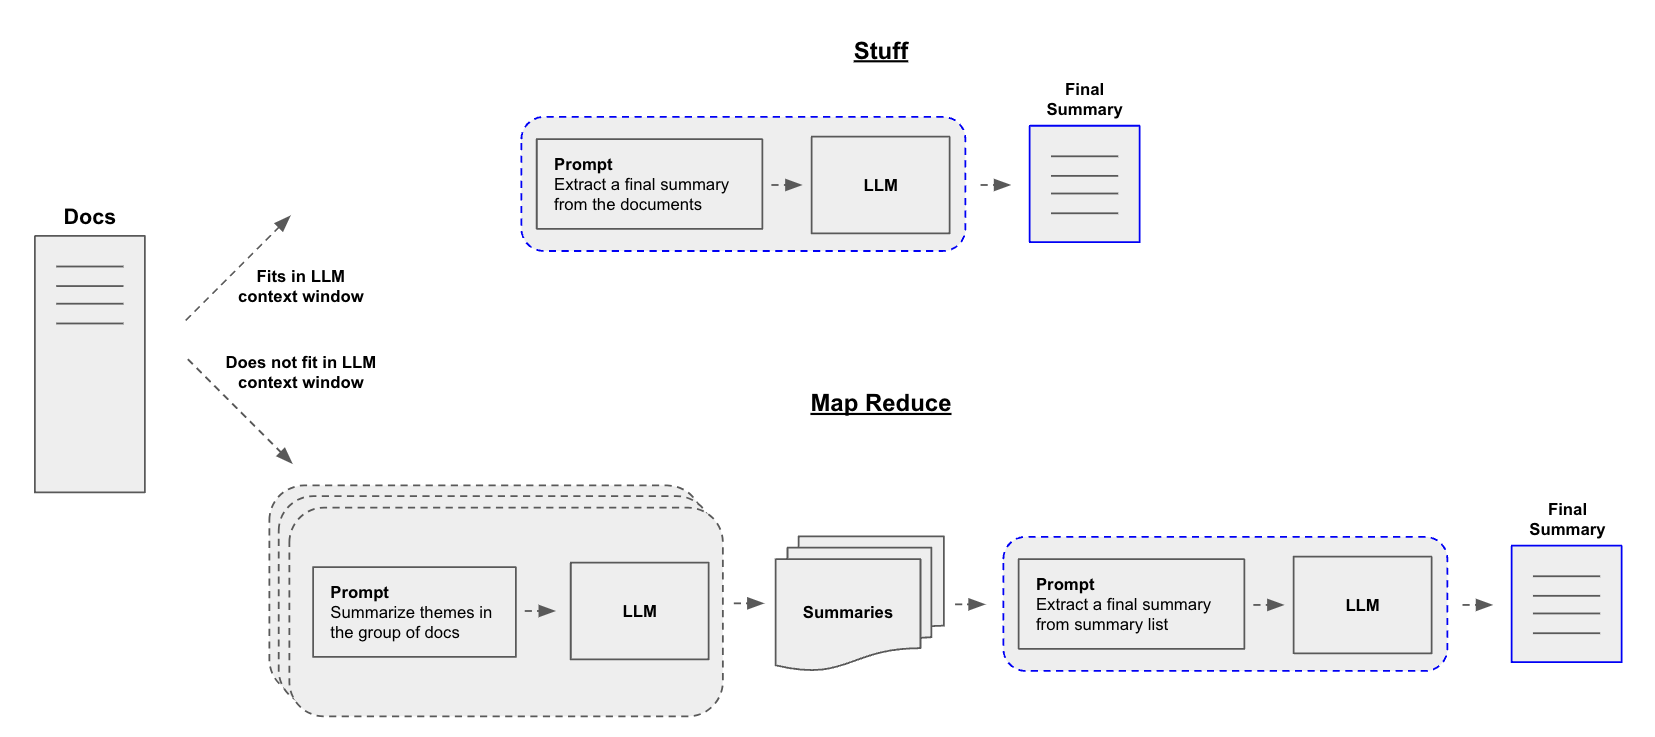

### **1. Summarizing with the 'stuff' Chain**

Stuffing is the simplest method, whereby you simply stuff all the related data into the prompt as context to pass to the language model. This is implemented in LangChain as the StuffDocumentsChain.

Pros: Only makes a single call to the LLM. When generating text, the LLM has access to all the data at once.

Cons: Most LLMs have a context length, and for large documents (or many documents) this will not work as it will result in a prompt larger than the context length.

The main downside of this method is that it only works one smaller pieces of data. Once you are working with many pieces of data, this approach is no longer feasible. The next two approaches are designed to help deal with that.*

In [14]:
from langchain_openai import ChatOpenAI
from langchain.chains.summarize import load_summarize_chain

llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo-0125',max_tokens=1024)

In [15]:
chain = load_summarize_chain(
    llm,
    chain_type='stuff',
    verbose=False
)
output_summary = chain.invoke(pdf[0:5])['output_text']

In [16]:
output_summary

'The paper "Attention Is All You Need" introduces a new model architecture called the Transformer, which relies solely on attention mechanisms and eliminates the need for recurrent or convolutional neural networks. The Transformer model achieves superior results in machine translation tasks, is more parallelizable, and requires less training time compared to existing models. The paper describes the architecture of the Transformer, including the encoder and decoder stacks, attention mechanisms, and position-wise feed-forward networks. The model uses multi-head attention to allow for joint attention to different representation subspaces at different positions. The paper also discusses the applications of attention in the model, such as encoder-decoder attention and self-attention layers. Overall, the Transformer model represents a significant advancement in sequence transduction models.'

In [17]:
import textwrap

wrapped_text=textwrap.fill(output_summary, width=100)
print(wrapped_text)

The paper "Attention Is All You Need" introduces a new model architecture called the Transformer,
which relies solely on attention mechanisms and eliminates the need for recurrent or convolutional
neural networks. The Transformer model achieves superior results in machine translation tasks, is
more parallelizable, and requires less training time compared to existing models. The paper
describes the architecture of the Transformer, including the encoder and decoder stacks, attention
mechanisms, and position-wise feed-forward networks. The model uses multi-head attention to allow
for joint attention to different representation subspaces at different positions. The paper also
discusses the applications of attention in the model, such as encoder-decoder attention and self-
attention layers. Overall, the Transformer model represents a significant advancement in sequence
transduction models.


In [18]:
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [19]:
chain.llm_chain.prompt.template="""Write a summary in 1000 tokens of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:"""

In [20]:
llm = ChatOpenAI(temperature=0, model_name='gpt-4-turbo-2024-04-09', max_tokens=1024)

chain = load_summarize_chain(
    llm,
    chain_type='stuff',
    #prompt=prompt,
    verbose=False
)
output_summary = chain.invoke(pdf[0:5])['output_text']
output_summary

'The paper "Attention Is All You Need" by Ashish Vaswani and colleagues introduces the Transformer, a novel neural network architecture that relies entirely on an attention mechanism, eliminating the need for recurrent layers. This model is designed to enhance parallelization, reduce training times, and improve performance in sequence transduction tasks like machine translation and parsing.\n\nTraditional sequence transduction models, such as those using recurrent neural networks (RNNs) or convolutional layers, process data sequentially, which limits parallel computing and increases training duration. The Transformer addresses these issues by using self-attention layers that process data in parallel, allowing it to learn dependencies without considering the distance between input and output positions.\n\nThe architecture of the Transformer consists of an encoder and a decoder, each made up of multiple layers. The encoder uses self-attention and point-wise, fully connected layers, while

In [21]:
wrapped_text=textwrap.fill(output_summary, width=100)
print(wrapped_text)

The paper "Attention Is All You Need" by Ashish Vaswani and colleagues introduces the Transformer, a
novel neural network architecture that relies entirely on an attention mechanism, eliminating the
need for recurrent layers. This model is designed to enhance parallelization, reduce training times,
and improve performance in sequence transduction tasks like machine translation and parsing.
Traditional sequence transduction models, such as those using recurrent neural networks (RNNs) or
convolutional layers, process data sequentially, which limits parallel computing and increases
training duration. The Transformer addresses these issues by using self-attention layers that
process data in parallel, allowing it to learn dependencies without considering the distance between
input and output positions.  The architecture of the Transformer consists of an encoder and a
decoder, each made up of multiple layers. The encoder uses self-attention and point-wise, fully
connected layers, while the d

In [22]:
chain.llm_chain.prompt.template="""Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:"""

### **2. Summarizing with the 'Map Reduce' Chain**
This method involves **an initial prompt on each chunk of data ***
( for summarization tasks, this could be a summary of that chunk; for question-answering tasks, it could be an answer based solely on that chunk). **Then a different prompt is run to combine all the initial outputs.** This is implemented in the LangChain as the MapReduceDocumentsChain.

**Pros:** Can scale to larger documents (and more documents) than StuffDocumentsChain. The calls to the LLM on individual documents are independent and can therefore be parallelized.

**Cons:** Requires many more calls to the LLM than StuffDocumentsChain. Loses some information during the final combining call.

In [23]:
from langchain.chains.summarize import load_summarize_chain
import textwrap

llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo-0125',max_tokens=1024)

In [24]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=0)
chunks = text_splitter.split_documents(pdf)

In [25]:
len(chunks)

15

In [26]:
chunks[0]

Document(page_content='Provided proper attribution is provided, Google hereby grants permission to\r\nreproduce the tables and figures in this paper solely for use in journalistic or\r\nscholarly works.\r\nAttention Is All You Need\r\nAshish Vaswani∗\r\nGoogle Brain\r\navaswani@google.com\r\nNoam Shazeer∗\r\nGoogle Brain\r\nnoam@google.com\r\nNiki Parmar∗\r\nGoogle Research\r\nnikip@google.com\r\nJakob Uszkoreit∗\r\nGoogle Research\r\nusz@google.com\r\nLlion Jones∗\r\nGoogle Research\r\nllion@google.com\r\nAidan N. Gomez∗ †\r\nUniversity of Toronto\r\naidan@cs.toronto.edu\r\nŁukasz Kaiser∗\r\nGoogle Brain\r\nlukaszkaiser@google.com\r\nIllia Polosukhin∗ ‡\r\nillia.polosukhin@gmail.com\r\nAbstract\r\nThe dominant sequence transduction models are based on complex recurrent or\r\nconvolutional neural networks that include an encoder and a decoder. The best\r\nperforming models also connect the encoder and decoder through an attention\r\nmechanism. We propose a new simple network architectu

In [27]:
chain = load_summarize_chain(llm,
                             chain_type="map_reduce")


output_summary = chain.invoke(chunks)["output_text"]
wrapped_text = textwrap.fill(output_summary, width=100)
print(wrapped_text)

The paper "Attention Is All You Need" introduces the Transformer model, which utilizes attention
mechanisms for sequence transduction tasks, outperforming existing models in machine translation
with faster training and better results. The model architecture includes stacked self-attention and
fully connected layers in both the encoder and decoder, with applications of Scaled Dot-Product
Attention and Multi-Head Attention. The study explores variations of the Transformer model for
translation and parsing tasks, showing strong performance and potential for future applications. The
paper also discusses the impact of American laws on voting processes and includes figures
illustrating attention heads in the encoder self-attention layer.


In [28]:
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7ff6d21608e0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7ff6d2146500>, model_name='gpt-3.5-turbo-0125', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7ff6d21608e0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7ff6d2146500>, model_name='gpt-3.5-turbo-0125', temperature=0.0, openai_api_key=Secre

In [29]:
# for summarizing each part
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [30]:
# for combining the parts
chain.combine_document_chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

### **Splitting and summarizing in a single chain**

In [31]:
combined_document= " ".join([i.page_content for i in pdf])

In [32]:
combined_document[:100]

'Provided proper attribution is provided, Google hereby grants permission to\r\nreproduce the tables an'

In [33]:
from langchain.chains import AnalyzeDocumentChain

summarize_document_chain = AnalyzeDocumentChain(
                                                combine_docs_chain=chain,
                                                text_splitter=text_splitter
)
summarize_text = summarize_document_chain.invoke(combined_document)
summarize_text["output_text"]

'Google grants permission to reproduce tables and figures from the paper "Attention Is All You Need," which introduces the Transformer model based on attention mechanisms for machine translation tasks. The model eliminates the need for recurrent or convolutional neural networks, allowing for faster training and more parallelization. The paper discusses the model architecture, attention mechanisms, training regime, and success in surpassing previous models. It also explores the potential of attention-based models for various tasks beyond text and the researchers\' plans to extend the model to handle inputs like images, audio, and video. The study emphasizes the importance of justice in the application of the law and provides references for further reading.'

In [34]:
wrapped_text = textwrap.fill(summarize_text["output_text"], width=100)
print(wrapped_text)

Google grants permission to reproduce tables and figures from the paper "Attention Is All You Need,"
which introduces the Transformer model based on attention mechanisms for machine translation tasks.
The model eliminates the need for recurrent or convolutional neural networks, allowing for faster
training and more parallelization. The paper discusses the model architecture, attention mechanisms,
training regime, and success in surpassing previous models. It also explores the potential of
attention-based models for various tasks beyond text and the researchers' plans to extend the model
to handle inputs like images, audio, and video. The study emphasizes the importance of justice in
the application of the law and provides references for further reading.


In [35]:
#prompt for every chunk
summarize_document_chain.combine_docs_chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [36]:
#prompt for combined summaries
summarize_document_chain.combine_docs_chain.reduce_documents_chain.combine_documents_chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

### **Map Reduce With Custom Prompts**

In [37]:
chain = load_summarize_chain(
    llm=llm,
    chain_type='map_reduce'
)
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7ff6d21608e0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7ff6d2146500>, model_name='gpt-3.5-turbo-0125', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7ff6d21608e0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7ff6d2146500>, model_name='gpt-3.5-turbo-0125', temperature=0.0, openai_api_key=Secre

In [38]:
# prompt for every chunk
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [39]:
# prompt for combined summaries
chain.reduce_documents_chain.combine_documents_chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'

In [40]:
# prompt for every chunk
from langchain import PromptTemplate

chunks_prompt="""
Please summarize the below text:
text:'{text}'
summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                   template=chunks_prompt)

In [41]:
# prompt for combined summaries
final_combine_prompt='''
Provide a final summary of the entire text with important points.
Add a Generic  Title,
Start the precise summary with an introduction and provide the
summary in number points for the text.
text: '{text}'
summary:
'''
final_combine_prompt_template=PromptTemplate(input_variables=['text'],
                                             template=final_combine_prompt)

In [42]:
chain = load_summarize_chain(
                            llm=llm,
                            chain_type='map_reduce',
                            map_prompt=map_prompt_template,
                            combine_prompt=final_combine_prompt_template
)
chain

MapReduceDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template="\nPlease summarize the below text:\ntext:'{text}'\nsummary:\n"), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7ff6d21608e0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7ff6d2146500>, model_name='gpt-3.5-turbo-0125', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), reduce_documents_chain=ReduceDocumentsChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template="\nProvide a final summary of the entire text with important points.\nAdd a Generic  Title,\nStart the precise summary with an introduction and provide the\nsummary in number points for the text.\ntext: '{text}'\nsummary:\n"), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7ff6d21608e0>, async_client=<openai.resources.ch

In [43]:
output_summary = chain.invoke(chunks)["output_text"]
wrapped_text = textwrap.fill(output_summary, replace_whitespace=False, width=200)
print(wrapped_text)

Title: Exploring the Transformer Model Architecture in Machine Translation Tasks

1. The Transformer model architecture, based on attention mechanisms, outperforms existing models in machine
translation tasks, achieving high BLEU scores on English-to-German and English-to-French translations with faster training times and better parallelizability.
2. The model relies entirely on attention
mechanisms to draw global dependencies between input and output, allowing for more parallelization and state-of-the-art translation quality results.
3. The Transformer model consists of stacked self-
attention and fully connected layers in both the encoder and decoder, with multi-head attention and feed-forward networks.
4. Scaled Dot-Product Attention and Multi-Head Attention are discussed in the
context of neural networks, with the Transformer model utilizing multi-head attention for joint attention to different representation subspaces.
5. The text compares self-attention layers to recurrent
and co

### With the 'refine' CombineDocument Chain

### **2. Summarizing with the 'Refine' Chain**

This method involves **an initial prompt on the first chunk of data, generating some output. For the remaining documents, that output is passed in, along with the next document**, asking the LLM to refine the output based on the new document.

**Pros:** Can pull in more relevant context, and may be less lossy than MapReduceDocumentsChain.

**Cons:** Requires many more calls to the LLM than StuffDocumentsChain. The calls are also NOT independent, meaning they cannot be paralleled like MapReduceDocumentsChain. There is also some potential dependencies on the ordering of the documents.

In [44]:
chain = load_summarize_chain(llm,
                             chain_type="refine")

output_summary = chain.invoke(chunks)["output_text"]

In [45]:
chain

RefineDocumentsChain(initial_llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7ff6d21608e0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7ff6d2146500>, model_name='gpt-3.5-turbo-0125', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1024)), refine_llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['existing_answer', 'text'], template="Your job is to produce a final summary.\nWe have provided an existing summary up to a certain point: {existing_answer}\nWe have the opportunity to refine the existing summary (only if needed) with some more context below.\n------------\n{text}\n------------\nGiven the new context, refine the original summary.\nIf the context isn't useful, return the original summary."), llm=ChatOpenAI(client=<

In [46]:
wrapped_text = textwrap.fill(output_summary, width=100)
print(wrapped_text)

The existing summary provides a detailed overview of the paper "Attention Is All You Need" and the
introduction of the Transformer model. The paper introduces the Transformer, a network architecture
that utilizes an attention mechanism for sequence transduction tasks, surpassing existing models in
machine translation. The Transformer allows for increased parallelization and achieves state-of-the-
art results with reduced training time. The authors highlight the contributions of each team member
in developing the model, which consists of stacked self-attention and point-wise, fully connected
layers for both the encoder and decoder. The attention function in the model maps queries and key-
value pairs to an output through a weighted sum. Additionally, the paper introduces Scaled Dot-
Product Attention and Multi-Head Attention mechanisms, enhancing the efficiency and performance of
the model by linearly projecting queries, keys, and values multiple times before performing the
attention fu

END OF THE PROJECT